<a href="https://colab.research.google.com/github/Zinwaiyan274/The-Oil-Palm-EDA/blob/main/Oil_palm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question **2**

*   the oil palm data





In [ ]:
import pandas as pd
p = pd.read_csv("https://raw.githubusercontent.com/Zinwaiyan274/Ace-assignment/main/data/palm_ffb.csv")
p.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [ ]:
p = p.iloc[:,1:] # Let's drop the Date column to be clear
p.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [ ]:
p.describe() #Summary Statistic of the palm data

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


Let's figure out "pairwise correlation"!



In [ ]:
import pingouin as pg
corr = pg.pairwise_corr(p, columns=[['FFB_Yield'], ['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation','Working_days','HA_Harvested']], method='pearson')
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
6,FFB_Yield,HA_Harvested,130,-0.350222,0.000044
4,FFB_Yield,Precipitation,130,0.289604,0.000832
5,FFB_Yield,Working_days,130,0.116364,0.187362
2,FFB_Yield,Min_Temp,130,0.103830,0.239760
3,FFB_Yield,Max_Temp,130,-0.071201,0.420821


From above pairwise, against FFB_yield, one Vs all correlation has been used to study all external factors correlation. We can reject the hypothesis that the two variables are not correlated if the p value is below 0.05, generally. So we could mention, there is a significant correlation between the all the variables against FFB_yield.
[ref](https://www.kaggle.com/code/andyc97/palm-data-clustering-and-feature-selection/notebook)



**Correlation**

There are few methods to calculate correlation in statistics 

*   Pearson
*   Kendall
*   Spearman 

Firstly, We gonna explore all of them. Let's check it out.












In [ ]:
p.corr(method='kendall', min_periods=1)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.436385,0.003297,-0.325954,0.391719,-0.039914,-0.230453,-0.026614
Average_Temp,-0.436385,1.000000,0.104283,0.552435,-0.226451,0.045905,0.350310,-0.032007
Min_Temp,0.003297,0.104283,1.000000,-0.115250,0.257578,-0.010040,-0.009035,0.057430
Max_Temp,-0.325954,0.552435,-0.115250,1.000000,-0.305475,-0.021220,0.225870,-0.075549
Precipitation,0.391719,-0.226451,0.257578,-0.305475,1.000000,0.055314,-0.193498,0.218215
Working_days,-0.039914,0.045905,-0.010040,-0.021220,0.055314,1.000000,0.032552,0.075699
HA_Harvested,-0.230453,0.350310,-0.009035,0.225870,-0.193498,0.032552,1.000000,-0.262379
FFB_Yield,-0.026614,-0.032007,0.057430,-0.075549,0.218215,0.075699,-0.262379,1.000000


In [ ]:
p.corr(method='spearman', min_periods=1)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.611158,0.008096,-0.465575,0.534844,-0.055768,-0.346520,-0.053962
Average_Temp,-0.611158,1.000000,0.150144,0.735619,-0.313273,0.063742,0.496968,-0.036249
Min_Temp,0.008096,0.150144,1.000000,-0.164203,0.368256,-0.010767,-0.016674,0.084286
Max_Temp,-0.465575,0.735619,-0.164203,1.000000,-0.427017,-0.025549,0.330195,-0.110524
Precipitation,0.534844,-0.313273,0.368256,-0.427017,1.000000,0.076471,-0.276535,0.311944
Working_days,-0.055768,0.063742,-0.010767,-0.025549,0.076471,1.000000,0.045001,0.099606
HA_Harvested,-0.346520,0.496968,-0.016674,0.330195,-0.276535,0.045001,1.000000,-0.385903
FFB_Yield,-0.053962,-0.036249,0.084286,-0.110524,0.311944,0.099606,-0.385903,1.000000


In [ ]:
p.corr(method='pearson', min_periods=1)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


**Red in the below charts indicates a positive correlation, Blue means negative correlation.**Below is default calculated by the suitable correlation method called "Pearson". "Spearman" method is also a great choice for us, but generally, "Pearson" method is more suitable for us, for our data and intentions

In [ ]:
p.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000,-0.650,0.016,-0.500,0.552,-0.057,-0.327,-0.003
Average_Temp,-0.650,1.000,0.180,0.761,-0.369,0.076,0.447,-0.005
Min_Temp,0.016,0.180,1.000,-0.125,0.346,0.068,0.024,0.104
Max_Temp,-0.500,0.761,-0.125,1.000,-0.461,-0.039,0.315,-0.071
Precipitation,0.552,-0.369,0.346,-0.461,1.000,0.128,-0.266,0.290
Working_days,-0.057,0.076,0.068,-0.039,0.128,1.000,0.049,0.116
HA_Harvested,-0.327,0.447,0.024,0.315,-0.266,0.049,1.000,-0.350
FFB_Yield,-0.003,-0.005,0.104,-0.071,0.290,0.116,-0.350,1.000


Text(0.5, 1.0, 'Correlation')

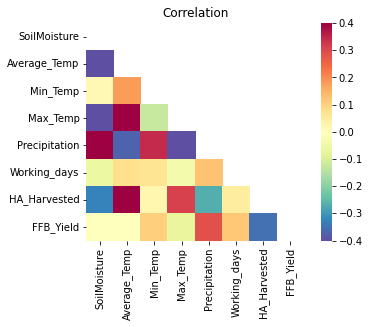

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
corrs = p.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation')

**By looking at the above charts, FFB_Yield has**

•weak positive correlation with Max_Temp and Min_Temp

•strong negative correlation with HA_Harvested

•strong positive correlation with Precipitation

•strong moderate correlation with Working days



 - Soil Moisture is negatively associated with FFB_Yield. 
 - Temperature variables show no significant association with FFB_Yield.



#Summary


**Please check the documentation** [here](https://docs.google.com/document/d/1UensMBB-UvfDT_5kMSoyp7Ei2O8j65actX6AbKSbU6s/edit?usp=sharing)